In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_excel("Copy of loan.xlsx")

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

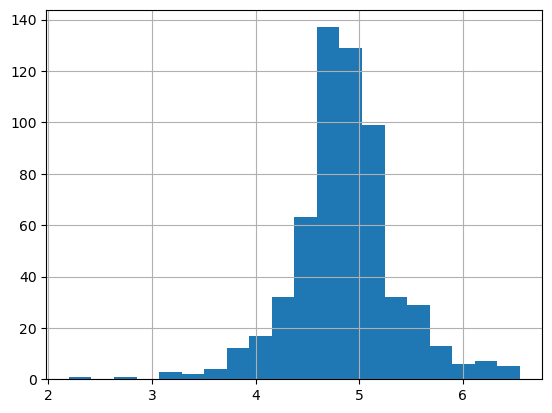

In [5]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

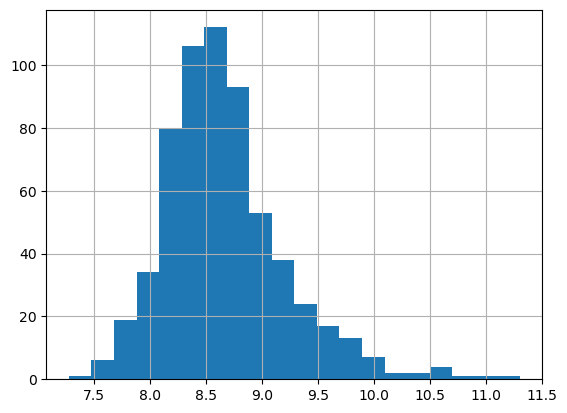

In [7]:
df['TotalIncome']=df['ApplicantIncome']+ df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace= True)
df['Married'].fillna(df['Married'].mode()[0],inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace= True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace= True)


C:\Users\EKTA SETHI\AppData\Local\Temp\ipykernel_3820\645136146.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace= True)
C:\Users\EKTA SETHI\AppData\Local\Temp\ipykernel_3820\645136146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [10]:
# Define the variables of interest
variables = ['LoanAmount', 'LoanAmount_log', 'TotalIncome_log']

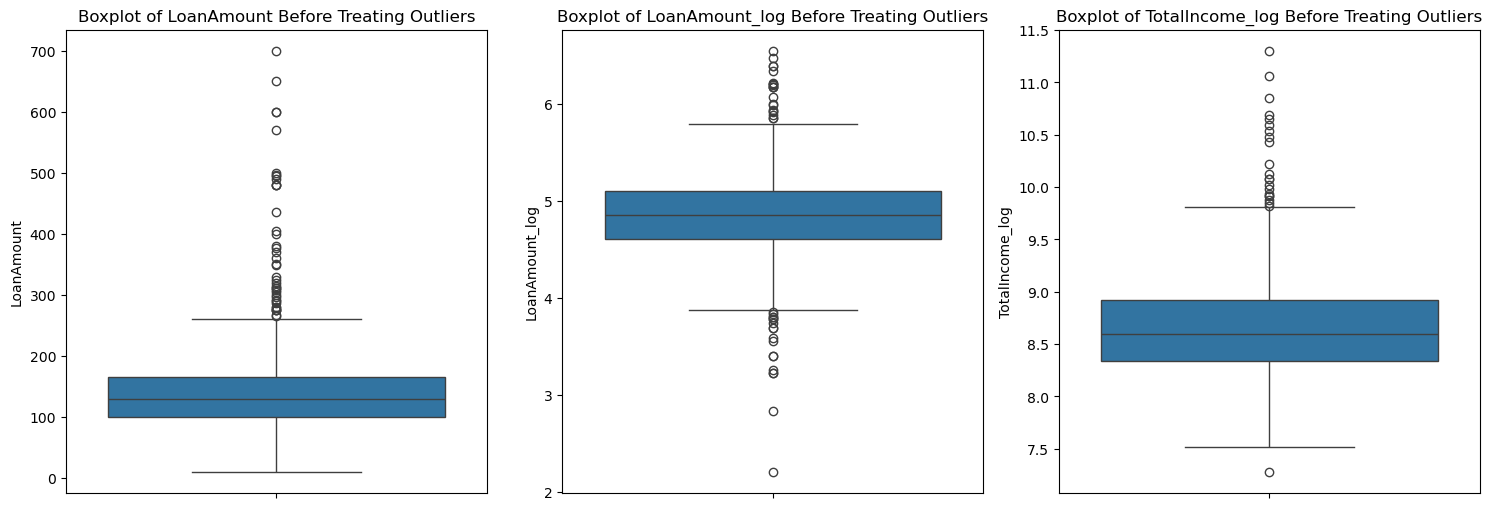

In [11]:
# Boxplots before treating outliers
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[var])
    plt.title(f'Boxplot of {var} Before Treating Outliers')

plt.tight_layout()
plt.show()

In [12]:
# Z-score treatment of outliers
df_outliers_removed = df.copy()

# Capping the outliers at the threshold value
threshold = 3
for var in variables:
    z_scores = stats.zscore(df_outliers_removed[var])
    df_outliers_removed[var] = np.where(z_scores > threshold, 
                                        df_outliers_removed[var].mean() + threshold * df_outliers_removed[var].std(),
                                        df_outliers_removed[var])
    df_outliers_removed[var] = np.where(z_scores < -threshold, 
                                        df_outliers_removed[var].mean() - threshold * df_outliers_removed[var].std(), 
                                        df_outliers_removed[var])



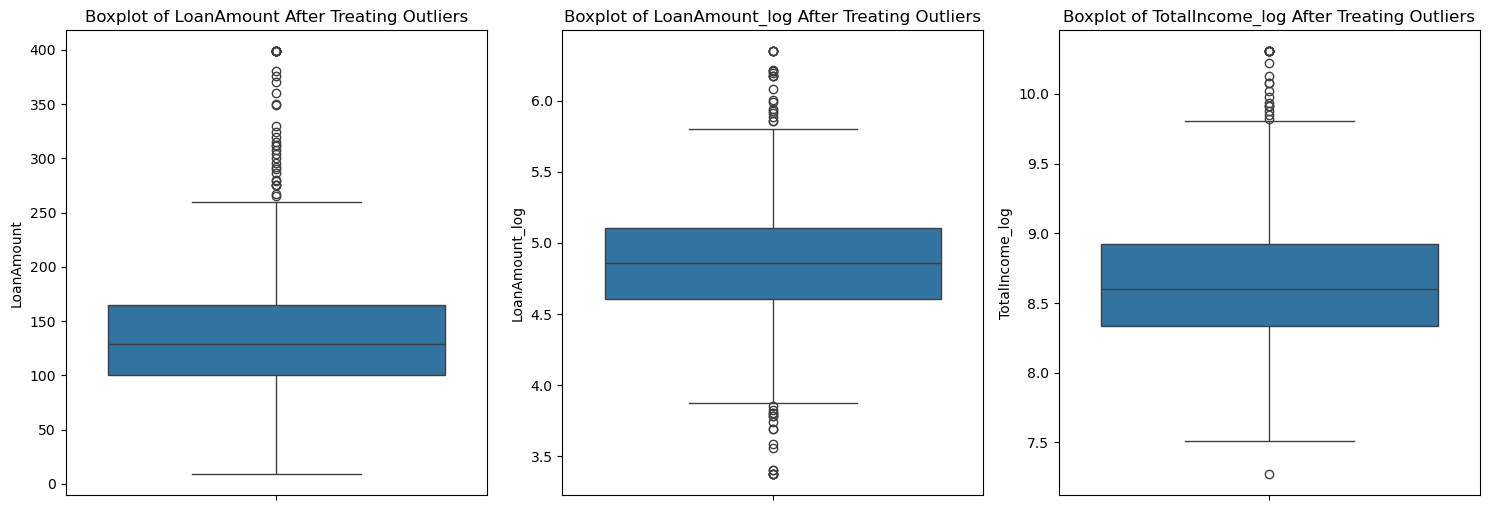

In [13]:
# Boxplots after treating outliers
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_outliers_removed[var])
    plt.title(f'Boxplot of {var} After Treating Outliers')

plt.tight_layout()
plt.show()

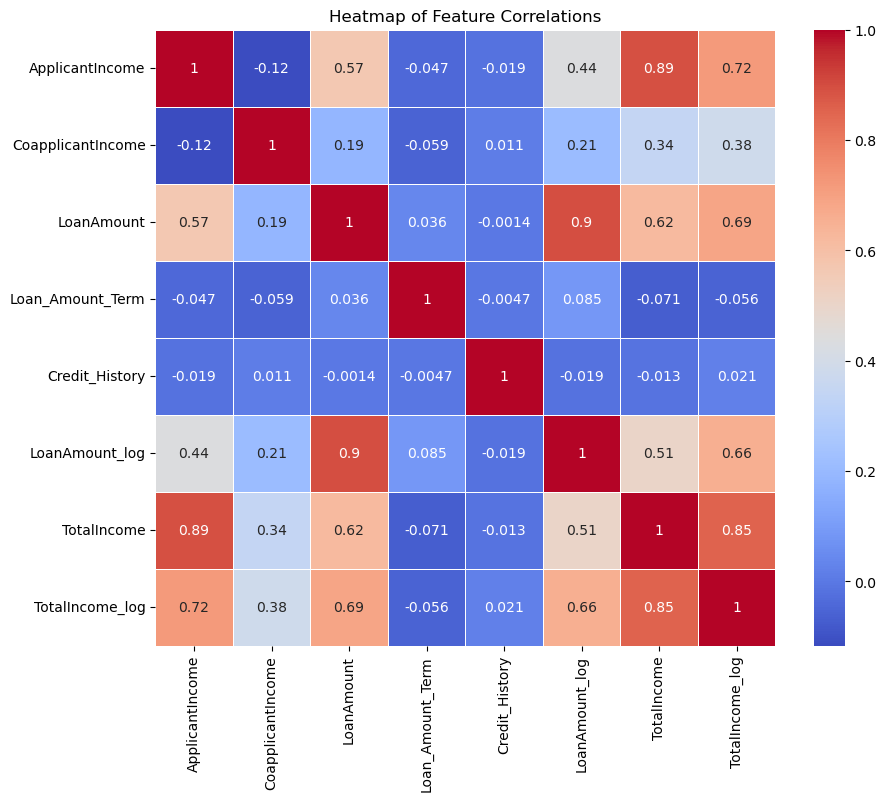

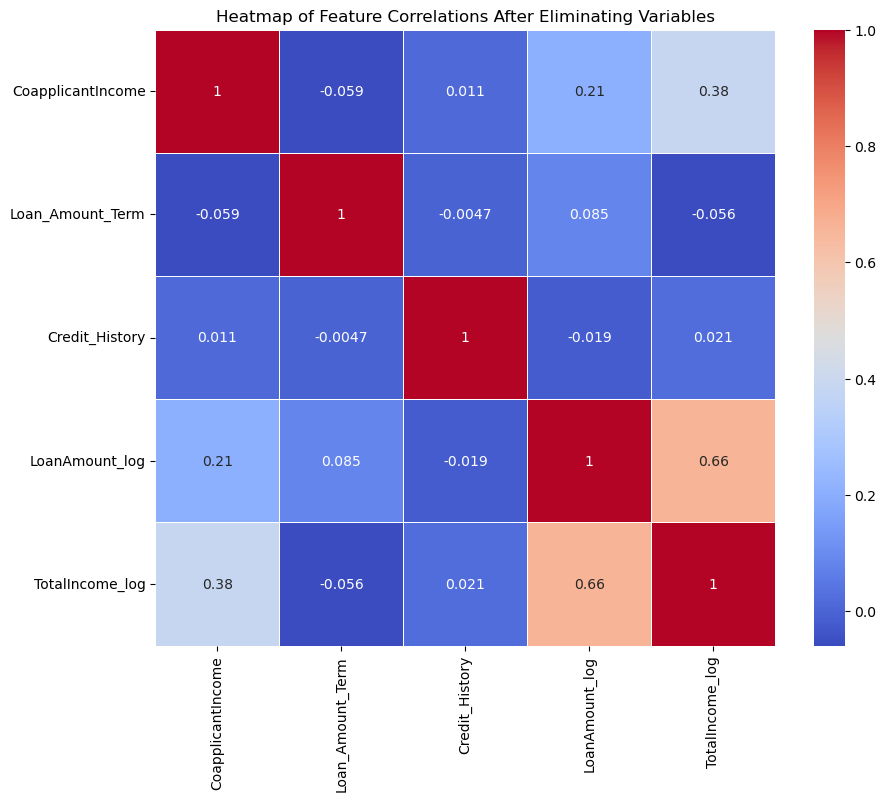

In [14]:
# Ensure that df contains only numeric data for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Remove specific columns from the DataFrame
columns_to_remove = ['LoanAmount' ,'TotalIncome','ApplicantIncome']
numeric_df_1 = numeric_df.drop(columns=columns_to_remove, errors='ignore')

# Generate and plot the heatmap for autocorrelation
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df_1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations After Eliminating Variables')
plt.show()

Gender
Male      502
Female    112
Name: count, dtype: int64


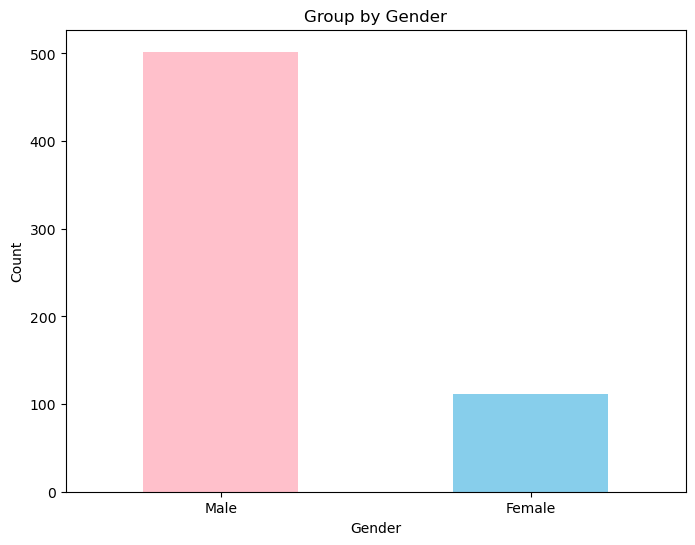

In [15]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Group by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Married
Yes    401
No     213
Name: count, dtype: int64


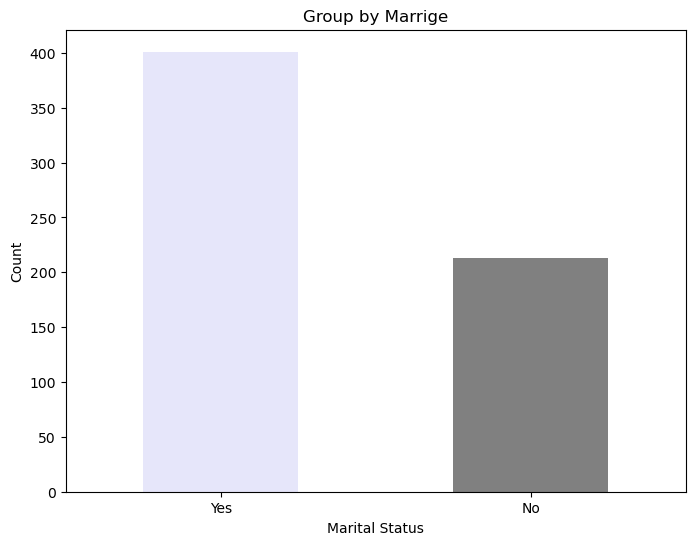

In [16]:
Married_counts = df['Married'].value_counts()
print(Married_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
Married_counts.plot(kind='bar', color=['lavender', 'grey'])
plt.title('Group by Marrige')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


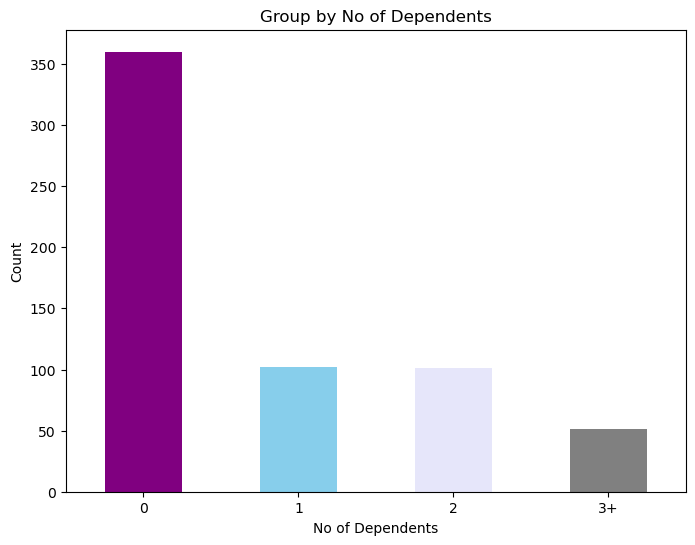

In [17]:
Dependents_counts = df['Dependents'].value_counts()
print(Dependents_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
Dependents_counts.plot(kind='bar', color=['purple', 'skyblue','lavender','grey'])
plt.title('Group by No of Dependents')
plt.xlabel('No of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


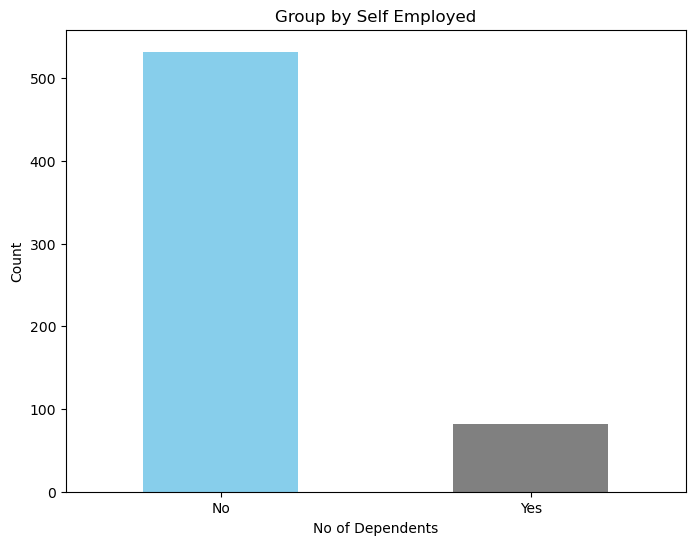

In [18]:
Self_Employed_counts = df['Self_Employed'].value_counts()
print(Self_Employed_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
Self_Employed_counts.plot(kind='bar', color=['skyblue', 'grey'])
plt.title('Group by Self Employed')
plt.xlabel('No of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
df
columns_to_remove_1=['CoapplicantIncome','ApplicantIncome','TotalIncome']
df=df.drop(columns=columns_to_remove_1, errors='ignore')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,Y,4.262680,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,Y,3.688879,8.320205
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,Y,5.533389,9.025456
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,Y,5.231109,8.933664


In [20]:
x= df.iloc[:,np.r_[1:9,11:13]].values
y=df.iloc[:,10].values
x




array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 8.674025985443025],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 8.714567550836485],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 8.006367567650246],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 9.025455532779063],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 8.933664178700935],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [22]:
# Step 1: Encode categorical columns in X_train
labelencoder_x = LabelEncoder()

for i in range(0, 5):  # Columns 0 to 4
    X_train[:, i] = labelencoder_x.fit_transform(X_train[:, i].astype(str))
    X_test[:, i] = labelencoder_x.transform(X_test[:, i].astype(str))  # Use transform for X_test
    # Encode the 7th column (index 6)
X_train[:, 7] = labelencoder_x.fit_transform(X_train[:, 7].astype(str))
X_test[:, 7] = labelencoder_x.transform(X_test[:, 7].astype(str))
X_test


array([[1, 0, 0, ..., 1, 4.430816798843313, 8.865735152124781],
       [0, 0, 0, ..., 1, 4.718498871295094, 8.349957272040324],
       [1, 1, 0, ..., 1, 5.780743515792329, 9.214232786691527],
       ...,
       [1, 1, 0, ..., 1, 6.077642243349034, 9.587611745713565],
       [1, 1, 3, ..., 0, 4.248495242049359, 8.436200032206706],
       [1, 1, 1, ..., 1, 4.564348191467836, 8.13973227971767]],
      dtype=object)

In [23]:
# Step 2: Encode the target variable y_train and y_test
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [24]:
Labelencoder_y=LabelEncoder()
y_test= Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [25]:

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)




In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
from sklearn import metrics
y_pred=rf_clf.predict(X_test)

print("Acc of random forest clf is ",metrics.accuracy_score(y_pred, y_test))

Acc of random forest clf is  0.7804878048780488


In [28]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt_clf.predict(X_test)
print("acc of DT is", metrics.accuracy_score(y_pred,y_test))

acc of DT is 0.6341463414634146


In [31]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [32]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [33]:
y_pred = kn_clf.predict(X_test)
print("acc of KN is", metrics.accuracy_score(y_pred,y_test))

acc of KN is 0.8211382113821138


In [34]:
from sklearn.linear_model import LogisticRegression
# Step 4: Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the target variable
y_pred = model.predict(X_test)


In [97]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(conf_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  14                  19
Actual Positive                   2                  88


In [99]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8292682926829268


In [79]:
# Calculate misclassification rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.1707317073170732


In [85]:
# Calculate true positive rate, false positive rate, true negative rate
tn, fp, fn, tp = conf_mat.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
print("Recall:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Specificity:", true_negative_rate)

Recall: 0.9777777777777777
False Positive Rate: 0.5757575757575758
Specificity: 0.42424242424242425


In [87]:
# Calculate precision
precision = tp / (tp + fp)
print("Precision:", precision)

Precision: 0.822429906542056


In [89]:
# Calculate prevalence
prevalence = (tp + fn) / (tp + tn + fp + fn)
print("Prevalence:", prevalence)

Prevalence: 0.7317073170731707


In [91]:
# Calculate F1 score
f1 = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)
print("F1 Score:", f1)

F1 Score: 0.8934010152284264


In [93]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

